## Predicting Medical Expenses using Linear Regression

ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.
  
Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer.
  
You're given a CSV file containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers.

In [1]:
%matplotlib inline
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import plotly.express as px
from sklearn.linear_model import LinearRegression

You should consider upgrading via the 'D:\repos\Medical model\MedicalModel\medmod\Scripts\python.exe -m pip install --upgrade pip' command.


## Data Handling

In [3]:
medical_df = pd.read_csv('insurance.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### In this dataset, 'sex','smoker' & 'region' columns contains categorical data.

In [5]:
print('SEX:',medical_df['sex'].unique())
print('SMOKER:',medical_df['smoker'].unique())
print('REGION:',medical_df['region'].unique())

SEX: ['female' 'male']
SMOKER: ['yes' 'no']
REGION: ['southwest' 'southeast' 'northwest' 'northeast']


- 'Sex' & 'Smoker' columns can be encoded to binary data .
- 'Region' column can be  one hot encoded.

In [6]:
medical_df=pd.get_dummies(medical_df, columns=['region'])
medical_df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,False,False,False,True
1,18,male,33.770,1,no,1725.55230,False,False,True,False
2,28,male,33.000,3,no,4449.46200,False,False,True,False
3,33,male,22.705,0,no,21984.47061,False,True,False,False
4,32,male,28.880,0,no,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,False,True,False,False
1334,18,female,31.920,0,no,2205.98080,True,False,False,False
1335,18,female,36.850,0,no,1629.83350,False,False,True,False
1336,21,female,25.800,0,no,2007.94500,False,False,False,True


#### Binary Encoding of 'Sex' & 'Smoker' columns using **map** function

In [7]:
medical_df['sex_code']=medical_df.sex.map({'female':0,'male':1})
medical_df['smoker_code']=medical_df.smoker.map({'no':0,'yes':1})
medical_df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_code,smoker_code
0,19,female,27.900,0,yes,16884.92400,False,False,False,True,0,1
1,18,male,33.770,1,no,1725.55230,False,False,True,False,1,0
2,28,male,33.000,3,no,4449.46200,False,False,True,False,1,0
3,33,male,22.705,0,no,21984.47061,False,True,False,False,1,0
4,32,male,28.880,0,no,3866.85520,False,True,False,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,False,True,False,False,1,0
1334,18,female,31.920,0,no,2205.98080,True,False,False,False,0,0
1335,18,female,36.850,0,no,1629.83350,False,False,True,False,0,0
1336,21,female,25.800,0,no,2007.94500,False,False,False,True,0,0


## Data Visualization

### AGE
 The minimum age in the dataset is 18 and the maximum age is 64.  

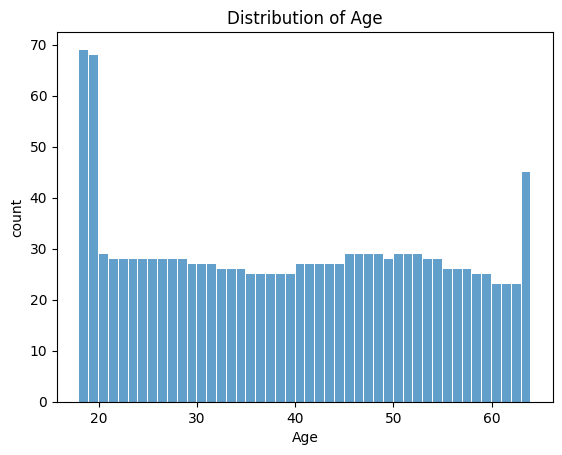

In [8]:
plt.hist(medical_df['age'],bins=(medical_df['age'].max()-medical_df['age'].min()),rwidth=0.9,alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age',)
plt.ylabel('count')

plt.show()

### Body Mass Index

Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

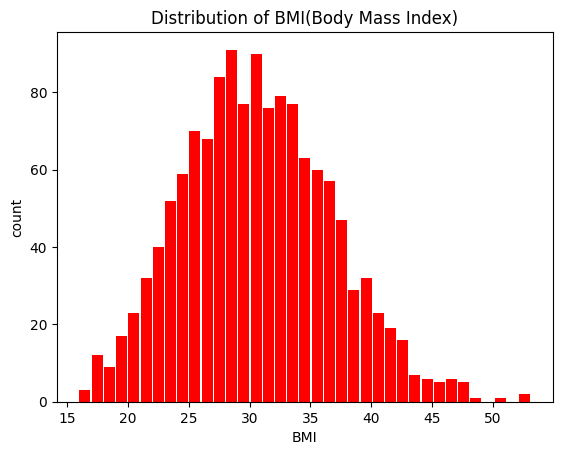

In [9]:
plt.hist(medical_df['bmi'],bins=int(medical_df['bmi'].max()-medical_df['bmi'].min()),rwidth=0.9,color='r')
plt.title('Distribution of BMI(Body Mass Index)')
plt.xlabel('BMI')
plt.ylabel('count')

plt.show()

### Charges

visualization of the distribution of "charges" i.e. the annual medical charges for for smoker and non-smoker customers,  to distinguish the charges .

In [10]:
# fig = px.histogram(medical_df, 
#                    x='charges',  
#                    color='smoker', 
#                    color_discrete_sequence=['green', 'grey'],
#                    title='Annual Medical Charges')
# fig.update_layout(bargap=0.1)

# fig.show()

### Age and Charges

Visualization of the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer.Values in the "smoker" column is used to color the points. Hover Data shows "sex".

In [11]:
# fig = px.scatter(medical_df, 
#                  x='age', 
#                  y='charges', 
#                  color='smoker', 
#                  opacity=0.8, 
#                  hover_data=['sex'], 
#                  title='Age vs. Charges')
# fig.update_traces(marker_size=5)
# fig.show()

## The Regression Model

####  the linear regression model.

### $charges = w_1 \times age + w_2 \times sex + w_3 \times bmi + w_4 \times children + w_5 \times smoker + w_6 \times region + b$

In [12]:
# split input/output data
input_columns = ['age', 'sex_code','bmi', 'children', 'smoker_code','region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
inputs,targets=medical_df[input_columns],medical_df['charges']

In [13]:
#create the model
model = LinearRegression()
#train the model
model.fit(inputs,targets)
#generate predictions
predictions=model.predict(inputs)

### Loss/Cost Function

We can compare our model's predictions with the actual targets using the **root mean squared error** (RMSE).  
it can be stated mathematically as follows: 



$$
rmse=\sqrt{\frac{1}{n}\left(\sum^n_{i=1}(y_i-y_{predicted}~)^2 \right)}
$$ 
  
  

In [14]:
def rmse(targets,predictions):
    return np.sqrt(np.mean([val**2 for val in (targets-predictions)]))

$$
R^2=\frac{\sum(y_{predicted}-y_{mean})^2}{\sum(y_{actual}-y_{mean})^2}
$$


In [15]:
#compute loss to evaluate the model
loss=rmse(targets,predictions)
r2_score=model.score(inputs,targets)

print('Loss:',loss,' R^2 score:',r2_score)

Loss: 6041.6796511744515  R^2 score: 0.7509130345985207


In [16]:
weights_df = pd.DataFrame({
    'feature': np.append(['age', 'bmi', 'children','smoker_code', 'sex_code', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'], 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
4,sex_code,23848.534542
5,region_northeast,587.009235
3,smoker_code,475.500545
2,children,339.193454
0,age,256.856353
6,region_northwest,234.045336
1,bmi,-131.314359
8,region_southwest,-373.041756
7,region_southeast,-448.012814
9,1,-12525.547811


In [17]:
!pip install pickle
import pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
You should consider upgrading via the 'D:\repos\Medical model\MedicalModel\medmod\Scripts\python.exe -m pip install --upgrade pip' command.


In [18]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [19]:
loaded_predict = loaded_model.predict(input)

d:\repos\Medical model\MedicalModel\medmod\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got scalar array instead:
array=<bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x00000188DBA25700>>.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.